In [172]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [173]:
# Used imports -- standard imports
import pandas as pd
import cbsodata
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Reading all the cbs data

In [174]:
# Converteer naar een Pandas DataFrame voor gemakkelijke manipulatie
df_algemeen = pd.DataFrame(cbsodata.get_data('83765NED'))

# Converteer naar een Pandas DataFrame voor gemakkelijke manipulatie
df_afstanden = pd.DataFrame(cbsodata.get_data('80305ned'))

# Converteer naar een Pandas DataFrame voor gemakkelijke manipulatie
df_gezondheidsmonitor = pd.DataFrame(cbsodata.get_data('85012NED'))

Gereed maken df_algemeen

In [ ]:
df_algemeen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16667 entries, 0 to 16666
Columns: 110 entries, ID to GeweldsEnSeksueleMisdrijven_108
dtypes: float64(65), int64(39), object(6)
memory usage: 14.0+ MB


In [ ]:
# Checking for possible values
for col in df_algemeen.columns:
    try:
        print('{} : {}'.format(col,df_algemeen[col].unique()))
    except:
        print(col)

ID : [    0     1     2 ... 16664 16665 16666]
WijkenEnBuurten : ['Nederland' 'Aa en Hunze' 'Wijk 00 Annen' ...
 'Wijk 52 Soestweteringlanden' 'Windesheim' 'Harculo en Hoogzutmen']
Gemeentenaam_1 : ['Nederland                               '
 'Aa en Hunze                             '
 'Aalburg                                 '
 'Aalsmeer                                '
 'Aalten                                  '
 'Achtkarspelen                           '
 'Alblasserdam                            '
 'Albrandswaard                           '
 'Alkmaar                                 '
 'Almelo                                  '
 'Almere                                  '
 'Alphen aan den Rijn                     '
 'Alphen-Chaam                            '
 'Ameland                                 '
 'Amersfoort                              '
 'Amstelveen                              '
 'Amsterdam                               '
 'Apeldoorn                               '
 'Appinged

In [ ]:
# Remove trailing spaces from column values
df_algemeen = df_algemeen.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Select only Gemeente specific data
df_algemeen = df_algemeen[(df_algemeen['SoortRegio_2'] == 'Gemeente')]

# Rename columns
df_algemeen.rename(columns={'Gemeentenaam_1': 'Gemeente'}, inplace=True)

# Dropping useless columns
df_algemeen.drop(columns=['ID', 'WijkenEnBuurten', 'SoortRegio_2', 'Codering_3', 'IndelingswijzigingWijkenEnBuurten_4', 'MeestVoorkomendePostcode_102'], inplace=True)

In [ ]:
df_algemeen

Gemeente  AantalInwoners_5  Mannen_6  Vrouwen_7  k_0Tot15Jaar_8  \
1          Aa en Hunze             25286     12603      12683            3572   
77             Aalburg             13067      6615       6452            2527   
100           Aalsmeer             31373     15516      15857            5866   
113             Aalten             27047     13625      13422            4459   
147      Achtkarspelen             27893     14185      13708            5112   
...                ...               ...       ...        ...             ...   
16374          Zundert             21657     11121      10536            2903   
16391          Zutphen             47340     23223      24117            7643   
16429  Zwartewaterland             22309     11360      10949            4728   
16470      Zwijndrecht             44417     21559      22858            7238   
16572           Zwolle            125548     61727      63821           22964   

       k_15Tot25Jaar_9  k_25Tot45Jaar_10  k_45Tot65Jaar_11  \
1                 2558              4383              8467   
77                1760              3006              3584   
100               3484              7221              9089   
113               2963              5641              8259   
147               3284              6404              7891   
...                ...               ...               ...   
16374             2589              4663              6995   
16391             5417             10501             14299   
16429             3043              5375              5571   
16470             4981             10352             12086   
16572            15916             35936             31950   

       k_65JaarOfOuder_12  Ongehuwd_13  ...  ScholenBinnen3Km_98  \
1                    6306         9951  ...                  1.8   
77                   2190         5639  ...                  2.5   
100                  5713        14718  ...                  4.4   
113                  5725        12044  ...                  4.6   
147                  5202        12565  ...                  3.5   
...                   ...          ...  ...                  ...   
16374                4507         9488  ...                  2.2   
16391                9480        21863  ...                 11.8   
16429                3592         9697  ...                  5.0   
16470                9760        18860  ...                 11.2   
16572               18782        65865  ...                 11.1   

       OppervlakteTotaal_99  OppervlakteLand_100  OppervlakteWater_101  \
1                     27887                27625                   262   
77                     5317                 5041                   276   
100                    3229                 2013                  1216   
113                    9705                 9654                    52   
147                   10398                10226                   172   
...                     ...                  ...                   ...   
16374                 12121                12070                    51   
16391                  4293                 4096                   197   
16429                  8786                 8267                   518   
16470                  2277                 2035                   243   
16572                 11936                11131                   805   

       Dekkingspercentage_103  MateVanStedelijkheid_104  \
1                         NaN                       5.0   
77                        NaN                       5.0   
100                       NaN                       4.0   
113                       NaN                       4.0   
147                       NaN                       5.0   
...                       ...                       ...   
16374                     NaN                       4.0   
16391                     NaN                       2.0   
16429                     NaN                       4.0   


In [ ]:
# Remove all _number
df_algemeen.columns = df_algemeen.columns.str.replace('_\d+', '', regex=True)

In [ ]:
# Remove specific columns what tell information about energie & aardgas verbruik, but those colums exist on avarage use.
df_algemeen.drop(columns=['Appartement', 'Tussenwoning', 'Hoekwoning', 'TweeOnderEenKapWoning', 'VrijstaandeWoning', 'Huurwoning', 'EigenWoning'], inplace=True)

<Axes: >

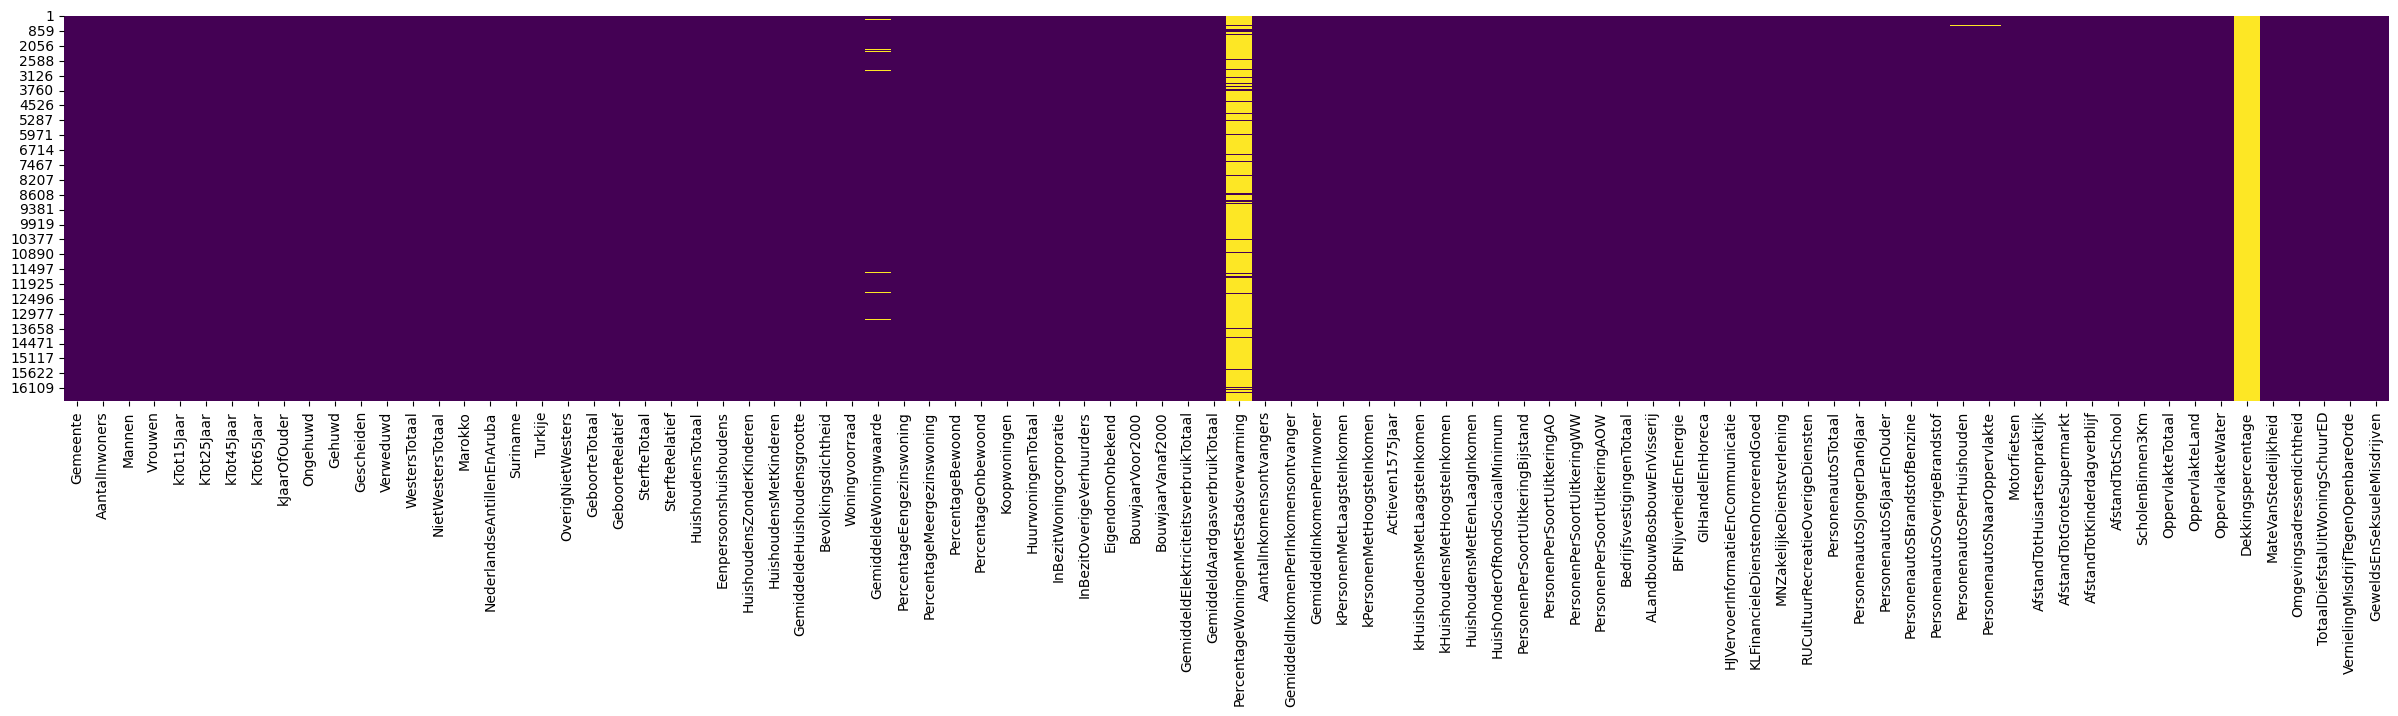

In [ ]:
# View a plot with all NaN values Yellow
fig, ax = plt.subplots(figsize=(30, 5))
sns.heatmap(df_algemeen.isnull(),cbar=False,cmap='viridis')

In [ ]:
# Drop columns with only NaN
df_algemeen.drop(columns=['PercentageWoningenMetStadsverwarming', 'Dekkingspercentage'], inplace=True)

# Filling missing data with avg
df_algemeen['GemiddeldeWoningwaarde'].fillna((df_algemeen['GemiddeldeWoningwaarde'].mean()), inplace=True)

Gereed maken df_afstanden

In [ ]:
df_afstanden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9452 entries, 0 to 9451
Columns: 128 entries, ID to AfstandTotBrandweerkazerne_125
dtypes: float64(125), int64(1), object(2)
memory usage: 9.2+ MB


In [ ]:
# Checking for possible values
for col in df_afstanden.columns:
    try:
        print('{} : {}'.format(col,df_afstanden[col].unique()))
    except:
        print(col)

ID : [   0    1    2 ... 9449 9450 9451]
RegioS : ['Nederland' 'Noord-Nederland (LD)' 'Oost-Nederland (LD)'
 'West-Nederland (LD)' 'Zuid-Nederland (LD)' 'Groningen (PV)'
 'Fryslân (PV)' 'Drenthe (PV)' 'Overijssel (PV)' 'Flevoland (PV)'
 'Gelderland (PV)' 'Utrecht (PV)' 'Noord-Holland (PV)' 'Zuid-Holland (PV)'
 'Zeeland (PV)' 'Noord-Brabant (PV)' 'Limburg (PV)' 'Oost-Groningen (CR)'
 'Delfzijl en omgeving (CR)' 'Overig Groningen (CR)'
 'Noord-Friesland (CR)' 'Zuidwest-Friesland (CR)'
 'Zuidoost-Friesland (CR)' 'Noord-Drenthe (CR)' 'Zuidoost-Drenthe (CR)'
 'Zuidwest-Drenthe (CR)' 'Noord-Overijssel (CR)'
 'Zuidwest-Overijssel (CR)' 'Twente (CR)' 'Veluwe (CR)' 'Achterhoek (CR)'
 'Arnhem/Nijmegen (CR)' 'Zuidwest-Gelderland (CR)' 'Utrecht (CR)'
 'Kop van Noord-Holland (CR)' 'Alkmaar en omgeving (CR)' 'IJmond (CR)'
 'Agglomeratie Haarlem (CR)' 'Zaanstreek (CR)' 'Groot-Amsterdam (CR)'
 'Het Gooi en Vechtstreek (CR)' 'Agglomeratie Leiden en Bollenstreek (CR)'
 "Agglomeratie 's-Gravenhage (CR)" 

In [ ]:
# Rename columns
df_afstanden.rename(columns={'RegioS': 'Gemeente'}, inplace=True)

# Replace values
df_afstanden["Gemeente"] = df_afstanden["Gemeente"].replace("Beek (L.)", "Beek")
df_afstanden["Gemeente"] = df_afstanden["Gemeente"].replace("Stein (L.)", "Stein")

# Separate Beekdaelen into 3 sepereate gemeentes
# beekdaelen = df_afstanden.loc[df_afstanden['Gemeente'] == 'Beekdaelen']

# schinnen_copy = beekdaelen.copy()
# schinnen_copy["Gemeente"] = beekdaelen["Gemeente"].replace("Beekdaelen", "Schinnen")
# 
# nuth_copy = beekdaelen.copy()
# nuth_copy["Gemeente"] = beekdaelen["Gemeente"].replace("Beekdaelen", "Nuth")
# 
# onderbanken_copy = beekdaelen.copy()
# onderbanken_copy["Gemeente"] = beekdaelen["Gemeente"].replace("Beekdaelen", "Onderbanken")

# Concatenate the copies to the original DataFrame
# df_afstanden = pd.concat([df_afstanden, schinnen_copy, nuth_copy, onderbanken_copy], ignore_index=True)

# Dropping useless columns
df_afstanden.drop(columns=['ID'], inplace=True)

<Axes: >

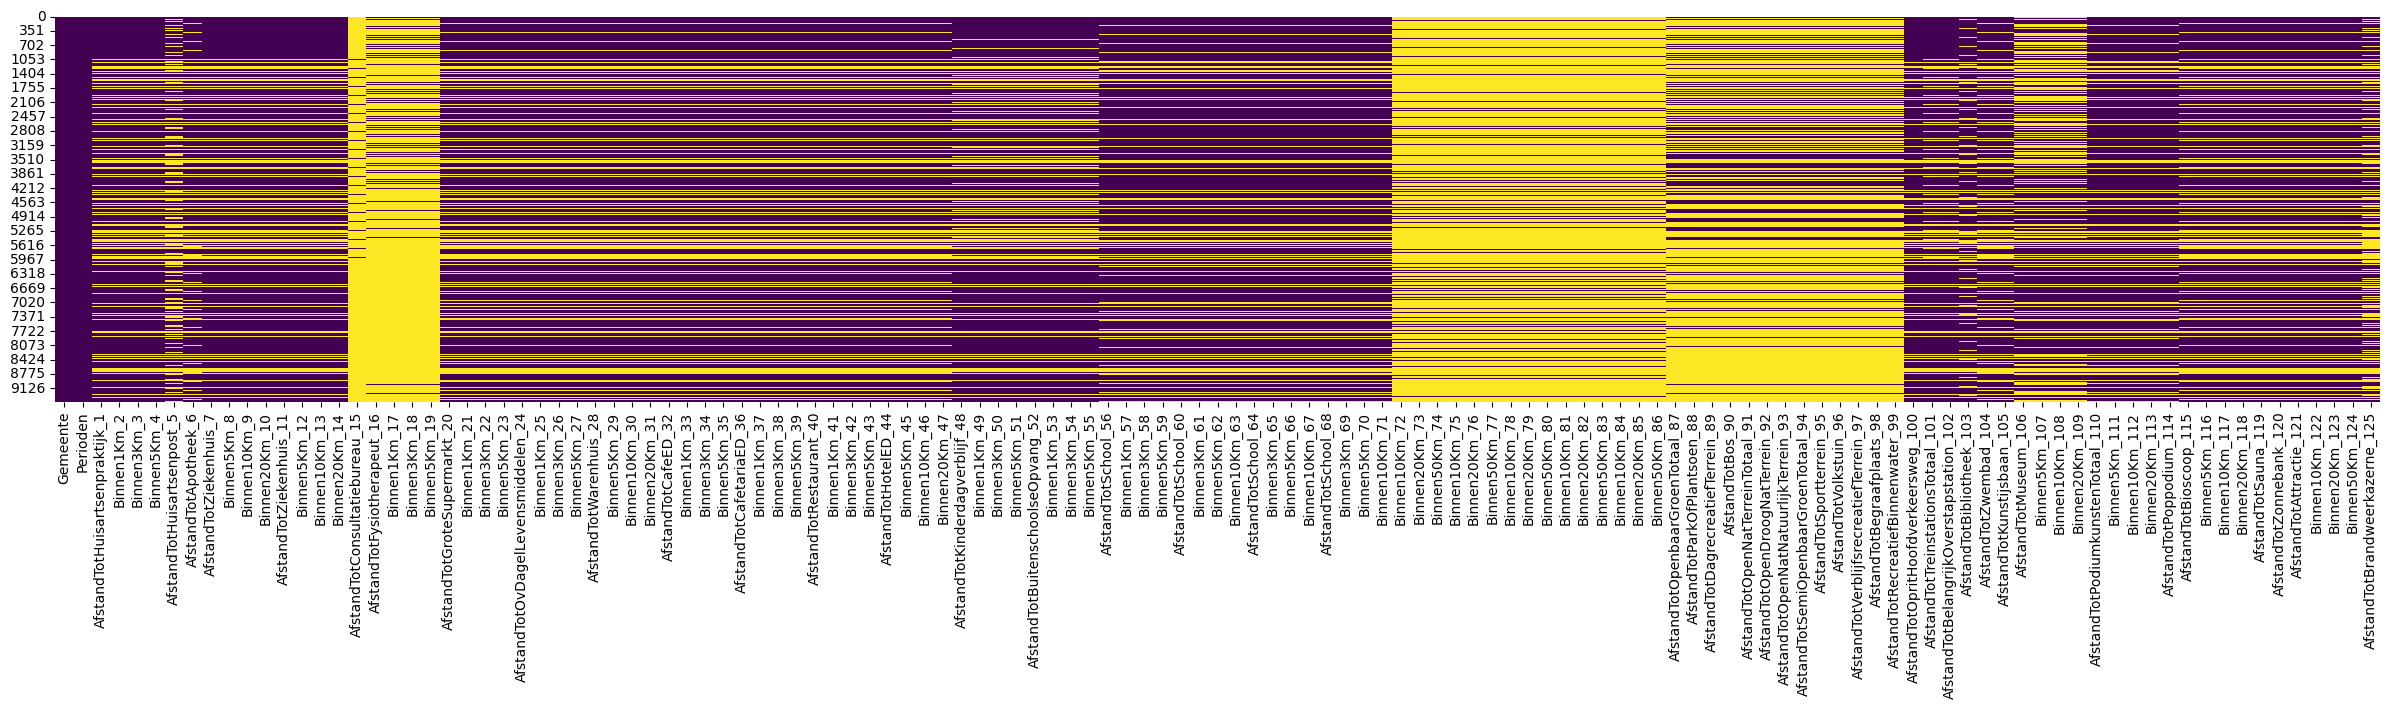

In [ ]:
# View a plot with all NaN values Yellow
fig, ax = plt.subplots(figsize=(30, 5))
sns.heatmap(df_afstanden.isnull(),cbar=False,cmap='viridis')

In [ ]:
# Sort the DataFrame by gemeente and perioden columns
df_afstanden = df_afstanden.sort_values(['Gemeente', 'Perioden'])

# Group the DataFrame by gemeente
grouped = df_afstanden.groupby('Gemeente')

# Fill missing values with data from the closest year
df_afstanden = grouped.apply(lambda group: group.fillna(method='bfill').fillna(method='ffill'))

# Reset the index to ungroup the DataFrame
df_afstanden = df_afstanden.reset_index(drop=True)

In [ ]:
# Remove all _number
df_afstanden.columns = df_afstanden.columns.str.replace('_\d+', '', regex=True)

In [ ]:
# Drop columns what are already defined in df algemeen
df_afstanden.drop(columns=[
    'AfstandTotHuisartsenpraktijk',
    'AfstandTotGroteSupermarkt',
    'AfstandTotKinderdagverblijf',
    'AfstandTotSchool',
    'AfstandTotSchool',
    'AfstandTotSchool',
    'AfstandTotSchool',
    'AfstandTotZiekenhuis'
], inplace=True)



Gereed maken df_gezondheidsmonitor

In [ ]:
df_gezondheidsmonitor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3582 entries, 0 to 3581
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    3582 non-null   int64  
 1   Leeftijd                              3582 non-null   object 
 2   Marges                                3582 non-null   object 
 3   RegioS                                3582 non-null   object 
 4   ErvarenGezondheidGoedZeerGoed_1       3564 non-null   float64
 5   EenOfMeerLangdurigeAandoeningen_2     3561 non-null   float64
 6   EenOfMeerLichamelijkeBeperkingen_3    3561 non-null   float64
 7   BeperkingInHoren_4                    3561 non-null   float64
 8   BeperkingInZien_5                     3561 non-null   float64
 9   BeperkingInBewegen_6                  3561 non-null   float64
 10  Ondergewicht_7                        3552 non-null   float64
 11  NormaalGewicht_8 

In [ ]:
# Checking for possible values
for col in df_gezondheidsmonitor.columns:
    try:
        print('{} : {}'.format(col,df_gezondheidsmonitor[col].unique()))
    except:
        print(col)

ID : [   0    1    2 ... 3579 3580 3581]
Leeftijd : ['Totaal' '18 tot 65 jaar' '65 jaar of ouder']
Marges : ['Waarde' 'Ondergrens 95%-interval' 'Bovengrens 95%-interval']
RegioS : ['Nederland' 'Noord-Nederland (LD)' 'Oost-Nederland (LD)'
 'West-Nederland (LD)' 'Zuid-Nederland (LD)' 'Groningen (PV)'
 'Fryslân (PV)' 'Drenthe (PV)' 'Overijssel (PV)' 'Flevoland (PV)'
 'Gelderland (PV)' 'Utrecht (PV)' 'Noord-Holland (PV)' 'Zuid-Holland (PV)'
 'Zeeland (PV)' 'Noord-Brabant (PV)' 'Limburg (PV)' 'Aa en Hunze'
 'Aalsmeer' 'Aalten' 'Achtkarspelen' 'Alblasserdam' 'Albrandswaard'
 'Alkmaar' 'Almelo' 'Almere' 'Alphen aan den Rijn' 'Alphen-Chaam' 'Altena'
 'Ameland' 'Amersfoort' 'Amstelveen' 'Amsterdam' 'Apeldoorn' 'Appingedam'
 'Arnhem' 'Assen' 'Asten' 'Baarle-Nassau' 'Baarn' 'Barendrecht'
 'Barneveld' 'Beek (L.)' 'Beekdaelen' 'Beemster' 'Beesel' 'Berg en Dal'
 'Bergeijk' 'Bergen (L.)' 'Bergen (NH.)' 'Bergen op Zoom' 'Berkelland'
 'Bernheze' 'Best' 'Beuningen' 'Beverwijk' 'De Bilt' 'Bladel' 'Blaric

In [ ]:
# Rename columns
df_gezondheidsmonitor.rename(columns={'RegioS': 'Gemeente'}, inplace=True)

# Replace values
df_gezondheidsmonitor["Gemeente"] = df_gezondheidsmonitor["Gemeente"].replace("Beek (L.)", "Beek")
df_gezondheidsmonitor["Gemeente"] = df_gezondheidsmonitor["Gemeente"].replace("Stein (L.)", "Stein")

# Separate Beekdaelen into 3 sepereate gemeentes
beekdaelen = df_gezondheidsmonitor.loc[df_gezondheidsmonitor['Gemeente'] == 'Beekdaelen']

schinnen_copy = beekdaelen.copy()
schinnen_copy["Gemeente"] = beekdaelen["Gemeente"].replace("Beekdaelen", "Schinnen")

nuth_copy = beekdaelen.copy()
nuth_copy["Gemeente"] = beekdaelen["Gemeente"].replace("Beekdaelen", "Nuth")

onderbanken_copy = beekdaelen.copy()
onderbanken_copy["Gemeente"] = beekdaelen["Gemeente"].replace("Beekdaelen", "Onderbanken")

# Concatenate the copies to the original DataFrame
df_gezondheidsmonitor = pd.concat([df_gezondheidsmonitor, schinnen_copy, nuth_copy, onderbanken_copy], ignore_index=True)

# Verkijg alle leeftijds categorieën (aangezien deze niet specifiek genoeg zijn)
df_gezondheidsmonitor = df_gezondheidsmonitor[df_gezondheidsmonitor['Leeftijd'] == 'Totaal']

# Verkijg enkel de marges
df_gezondheidsmonitor = df_gezondheidsmonitor[df_gezondheidsmonitor['Marges'] == 'Waarde']

# Dropping useless columns
df_gezondheidsmonitor.drop(columns=['ID', 'Leeftijd', 'Marges'], inplace=True)

In [ ]:
df_gezondheidsmonitor

Gemeente  ErvarenGezondheidGoedZeerGoed_1  \
0                         Nederland                             79.1   
1              Noord-Nederland (LD)                             79.3   
2               Oost-Nederland (LD)                             79.7   
3               West-Nederland (LD)                             79.4   
4               Zuid-Nederland (LD)                             77.4   
...                             ...                              ...   
396                GGD Fryslân (GG)                             80.7   
397   GGD Zaanstreek/Waterland (GG)                             78.8   
3582                       Schinnen                             73.7   
3591                           Nuth                             73.7   
3600                    Onderbanken                             73.7   

      EenOfMeerLangdurigeAandoeningen_2  EenOfMeerLichamelijkeBeperkingen_3  \
0                                  32.2                                14.5   
1                                  33.2                                13.6   
2                                  32.6                                14.2   
3                                  31.3                                14.1   
4                                  33.2                                15.9   
...                                 ...                                 ...   
396                                32.9                                12.8   
397                                33.4                                14.4   
3582                               37.2                                16.9   
3591                               37.2                                16.9   
3600                               37.2                                16.9   

      BeperkingInHoren_4  BeperkingInZien_5  BeperkingInBewegen_6  \
0                    4.4                5.4                   9.0   
1                    3.9                4.6                   8.9   
2                    4.4                5.0                   8.6   
3                    4.2                5.4                   8.9   
4                    5.0                5.9                   9.9   
...                  ...                ...                   ...   
396                  3.6                4.4                   8.2   
397                  3.6                5.9                   8.7   
3582                 5.8                5.6                  10.7   
3591                 5.8                5.6                  10.7   
3600                 5.8                5.6                  10.7   

      Ondergewicht_7  NormaalGewicht_8  Overgewicht_9  ...  \
0                1.7              48.8           49.4  ...   
1                1.6              47.0           51.4  ...   
2                1.5              47.3           51.2  ...   
3                1.9              50.8           47.4  ...   
4                1.7              46.9           51.5  ...   
...              ...               ...            ...  ...   
396              1.6              47.4           51.0  ...   
397              1.3              46.5           52.2  ...   
3582             1.4              43.0           55.6  ...   
3591             1.4              43.0           55.6  ...   
3600             1.4              43.0           55.6  ...   

      ErnstigOvergewichtObesitas_11  VoldoetAanBeweegrichtlijn_12  \
0                              14.7                          50.4   
1                              15.4                          51.0   
2                              15.4                          51.1   
3                              13.8                           NaN   
4                              15.7                          48.9   
...                             ...                           ...   
396                            14.5                          53.7   
397                            16.0                          46.7   
3582              

In [ ]:
# Remove all _number
df_gezondheidsmonitor.columns = df_gezondheidsmonitor.columns.str.replace('_\d+', '', regex=True)

Merge dataframes

In [ ]:
# Perform the first merge between df1 and df2
df_cbsodata = pd.merge(df_algemeen, df_afstanden, on="Gemeente", how="inner")

# Perform the second merge between the result of the first merge and df3
df_cbsodata = pd.merge(df_cbsodata, df_gezondheidsmonitor, on="Gemeente", how="inner")

In [ ]:
df_cbsodata

Gemeente  AantalInwoners  Mannen  Vrouwen  kTot15Jaar  kTot25Jaar  \
0     Aa en Hunze           25286   12603    12683        3572        2558   
1     Aa en Hunze           25286   12603    12683        3572        2558   
2     Aa en Hunze           25286   12603    12683        3572        2558   
3     Aa en Hunze           25286   12603    12683        3572        2558   
4     Aa en Hunze           25286   12603    12683        3572        2558   
...           ...             ...     ...      ...         ...         ...   
5758       Zwolle          125548   61727    63821       22964       15916   
5759       Zwolle          125548   61727    63821       22964       15916   
5760       Zwolle          125548   61727    63821       22964       15916   
5761       Zwolle          125548   61727    63821       22964       15916   
5762       Zwolle          125548   61727    63821       22964       15916   

      kTot45Jaar  kTot65Jaar  kJaarOfOuder  Ongehuwd  ...  \
0           4383        8467          6306      9951  ...   
1           4383        8467          6306      9951  ...   
2           4383        8467          6306      9951  ...   
3           4383        8467          6306      9951  ...   
4           4383        8467          6306      9951  ...   
...          ...         ...           ...       ...  ...   
5758       35936       31950         18782     65865  ...   
5759       35936       31950         18782     65865  ...   
5760       35936       31950         18782     65865  ...   
5761       35936       31950         18782     65865  ...   
5762       35936       31950         18782     65865  ...   

      ErnstigOvergewichtObesitas  VoldoetAanBeweegrichtlijn  WekelijksSporter  \
0                           14.9                       47.3              48.3   
1                           14.9                       47.3              48.3   
2                           14.9                       47.3              48.3   
3                           14.9                       47.3              48.3   
4                           14.9                       47.3              48.3   
...                          ...                        ...               ...   
5758                        11.0                       54.6              54.4   
5759                        11.0                       54.6              54.4   
5760                        11.0                       54.6              54.4   
5761                        11.0                       54.6              54.4   
5762                        11.0                       54.6              54.4   

      Mantelzorger  ZwaarBelasteMantelzorgers  UrenMantelzorgPerWeek  Rokers  \
0             16.1                       17.1                    9.3    14.3   
1             16.1                       17.1                    9.3    14.3   
2             16.1                       17.1                    9.3    14.3   
3             16.1                       17.1                    9.3    14.3   
4             16.1                       17.1                    9.3    14.3   
...            ...                        ...                    ...     ...   
5758          13.1                       12.2                   11.3    17.6   
5759          13.1                       12.2                   11.3    17.6   
5760          13.1                       12.2                   11.3    17.6   
5761          13.1                       12.2                   11.3    17.6   
5762          13.1                       12.2                   11.3    17.6   

      VoldoetAanRichtlijnAlcoholgebruik  ZwareDrinker  OvermatigDrinker  
0                                  40.6           7.1               5.4  
1                                  40.6           7.1               5.4  
2                                  40.6           7.1               5.4  
3                                  40.6           7.1               5.4  
4                                  

<Axes: >

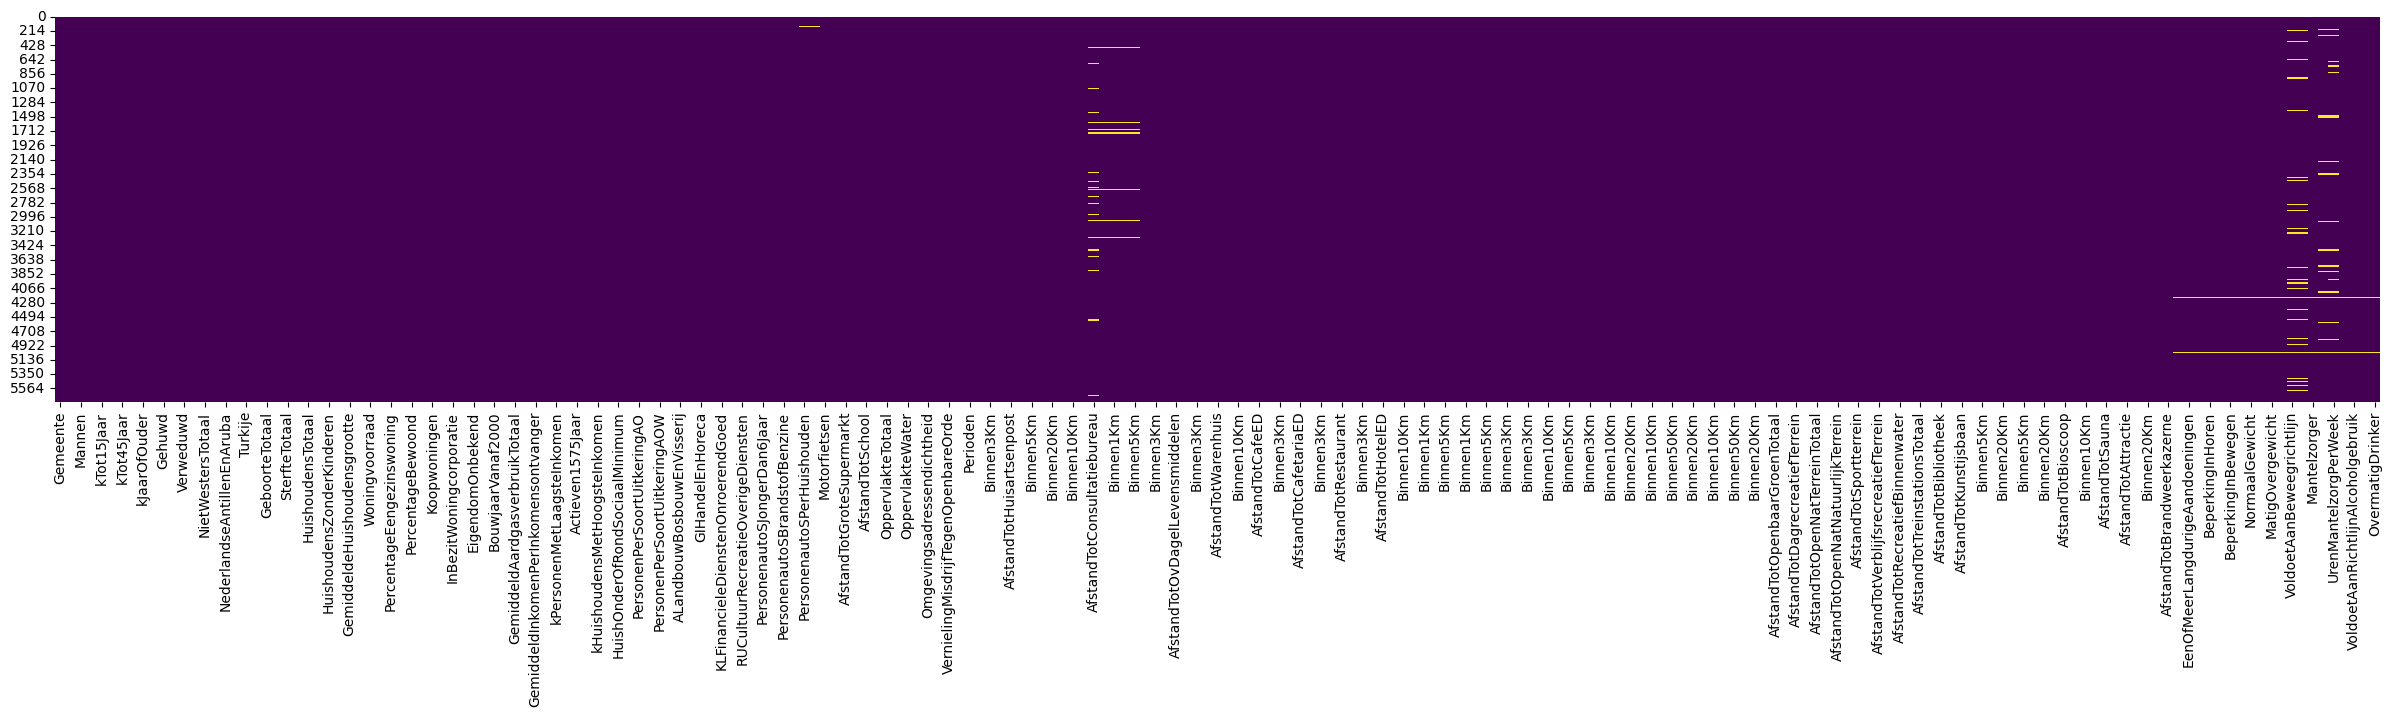

In [ ]:
# View a plot with all NaN values Yellow
fig, ax = plt.subplots(figsize=(30, 5))
sns.heatmap(df_cbsodata.isnull(),cbar=False,cmap='viridis')

In [ ]:
df_cbsodata

Gemeente  Turkije  GeboorteRelatief  SterfteRelatief  \
0     Aa en Hunze       10                 6               10   
1     Aa en Hunze       10                 6               10   
2     Aa en Hunze       10                 6               10   
3     Aa en Hunze       10                 6               10   
4     Aa en Hunze       10                 6               10   
...           ...      ...               ...              ...   
5758       Zwolle     2509                11                7   
5759       Zwolle     2509                11                7   
5760       Zwolle     2509                11                7   
5761       Zwolle     2509                11                7   
5762       Zwolle     2509                11                7   

      GemiddeldeHuishoudensgrootte  PercentageOnbewoond  \
0                              2.2                  5.0   
1                              2.2                  5.0   
2                              2.2                  5.0   
3                              2.2                  5.0   
4                              2.2                  5.0   
...                            ...                  ...   
5758                           2.1                  3.0   
5759                           2.1                  3.0   
5760                           2.1                  3.0   
5761                           2.1                  3.0   
5762                           2.1                  3.0   

      InBezitWoningcorporatie  InBezitOverigeVerhuurders  EigendomOnbekend  \
0                        18.0                       10.0               2.0   
1                        18.0                       10.0               2.0   
2                        18.0                       10.0               2.0   
3                        18.0                       10.0               2.0   
4                        18.0                       10.0               2.0   
...                       ...                        ...               ...   
5758                     33.0                       14.0               1.0   
5759                     33.0                       14.0               1.0   
5760                     33.0                       14.0               1.0   
5761                     33.0                       14.0               1.0   
5762                     33.0                       14.0               1.0   

      BouwjaarVanaf2000  ...  MatigOvergewicht  ErnstigOvergewichtObesitas  \
0                  10.0  ...              34.3                        14.9   
1                  10.0  ...              34.3                        14.9   
2                  10.0  ...              34.3                        14.9   
3                  10.0  ...              34.3                        14.9   
4                  10.0  ...              34.3                        14.9   
...                 ...  ...               ...                         ...   
5758               20.0  ...              34.8                        11.0   
5759               20.0  ...              34.8                        11.0   
5760               20.0  ...              34.8                        11.0   
5761               20.0  ...              34.8                        11.0   
5762               20.0  ...              34.8                        11.0   

      VoldoetAanBeweegrichtlijn  WekelijksSporter  Mantelzorger  \
0                          47.3              48.3          16.1   
1                          47.3              48.3          16.1   
2                          47.3              48.3          16.1   
3                          47.3              48.3          16.1   
4                          47.3              48.3          16.1   
...                         ...               ...           ...   
5758                       54.6              54.4          13.1   
5759                       54.6              54.4          13.1   
5760                       54.6           

In [ ]:
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# fit on the dataset
imputer.fit(df_cbsodata.drop(columns=['Gemeente']))

# transform the dataset
Xtrans = imputer.transform(df_cbsodata.drop(columns=['Gemeente']))

# Convert the transformed array (Xtrans) back to a DataFrame
df_filled = pd.DataFrame(Xtrans, columns=df_cbsodata.drop(columns=['Gemeente']).columns)

# Add the 'Gemeente' column back to the filled DataFrame
df_filled['Gemeente'] = df_cbsodata['Gemeente']

# Reorder the columns to match the original DataFrame
df_cbsodata = df_filled[df_cbsodata.columns]

In [ ]:
df_cbsodata

Gemeente  Turkije  GeboorteRelatief  SterfteRelatief  \
0     Aa en Hunze     10.0               6.0             10.0   
1     Aa en Hunze     10.0               6.0             10.0   
2     Aa en Hunze     10.0               6.0             10.0   
3     Aa en Hunze     10.0               6.0             10.0   
4     Aa en Hunze     10.0               6.0             10.0   
...           ...      ...               ...              ...   
5758       Zwolle   2509.0              11.0              7.0   
5759       Zwolle   2509.0              11.0              7.0   
5760       Zwolle   2509.0              11.0              7.0   
5761       Zwolle   2509.0              11.0              7.0   
5762       Zwolle   2509.0              11.0              7.0   

      GemiddeldeHuishoudensgrootte  PercentageOnbewoond  \
0                              2.2                  5.0   
1                              2.2                  5.0   
2                              2.2                  5.0   
3                              2.2                  5.0   
4                              2.2                  5.0   
...                            ...                  ...   
5758                           2.1                  3.0   
5759                           2.1                  3.0   
5760                           2.1                  3.0   
5761                           2.1                  3.0   
5762                           2.1                  3.0   

      InBezitWoningcorporatie  InBezitOverigeVerhuurders  EigendomOnbekend  \
0                        18.0                       10.0               2.0   
1                        18.0                       10.0               2.0   
2                        18.0                       10.0               2.0   
3                        18.0                       10.0               2.0   
4                        18.0                       10.0               2.0   
...                       ...                        ...               ...   
5758                     33.0                       14.0               1.0   
5759                     33.0                       14.0               1.0   
5760                     33.0                       14.0               1.0   
5761                     33.0                       14.0               1.0   
5762                     33.0                       14.0               1.0   

      BouwjaarVanaf2000  ...  MatigOvergewicht  ErnstigOvergewichtObesitas  \
0                  10.0  ...              34.3                        14.9   
1                  10.0  ...              34.3                        14.9   
2                  10.0  ...              34.3                        14.9   
3                  10.0  ...              34.3                        14.9   
4                  10.0  ...              34.3                        14.9   
...                 ...  ...               ...                         ...   
5758               20.0  ...              34.8                        11.0   
5759               20.0  ...              34.8                        11.0   
5760               20.0  ...              34.8                        11.0   
5761               20.0  ...              34.8                        11.0   
5762               20.0  ...              34.8                        11.0   

      VoldoetAanBeweegrichtlijn  WekelijksSporter  Mantelzorger  \
0                          47.3              48.3          16.1   
1                          47.3              48.3          16.1   
2                          47.3              48.3          16.1   
3                          47.3              48.3          16.1   
4                          47.3              48.3          16.1   
...                         ...               ...           ...   
5758                       54.6              54.4          13.1   
5759                       54.6              54.4          13.1   
5760                       54.6           

<Axes: >

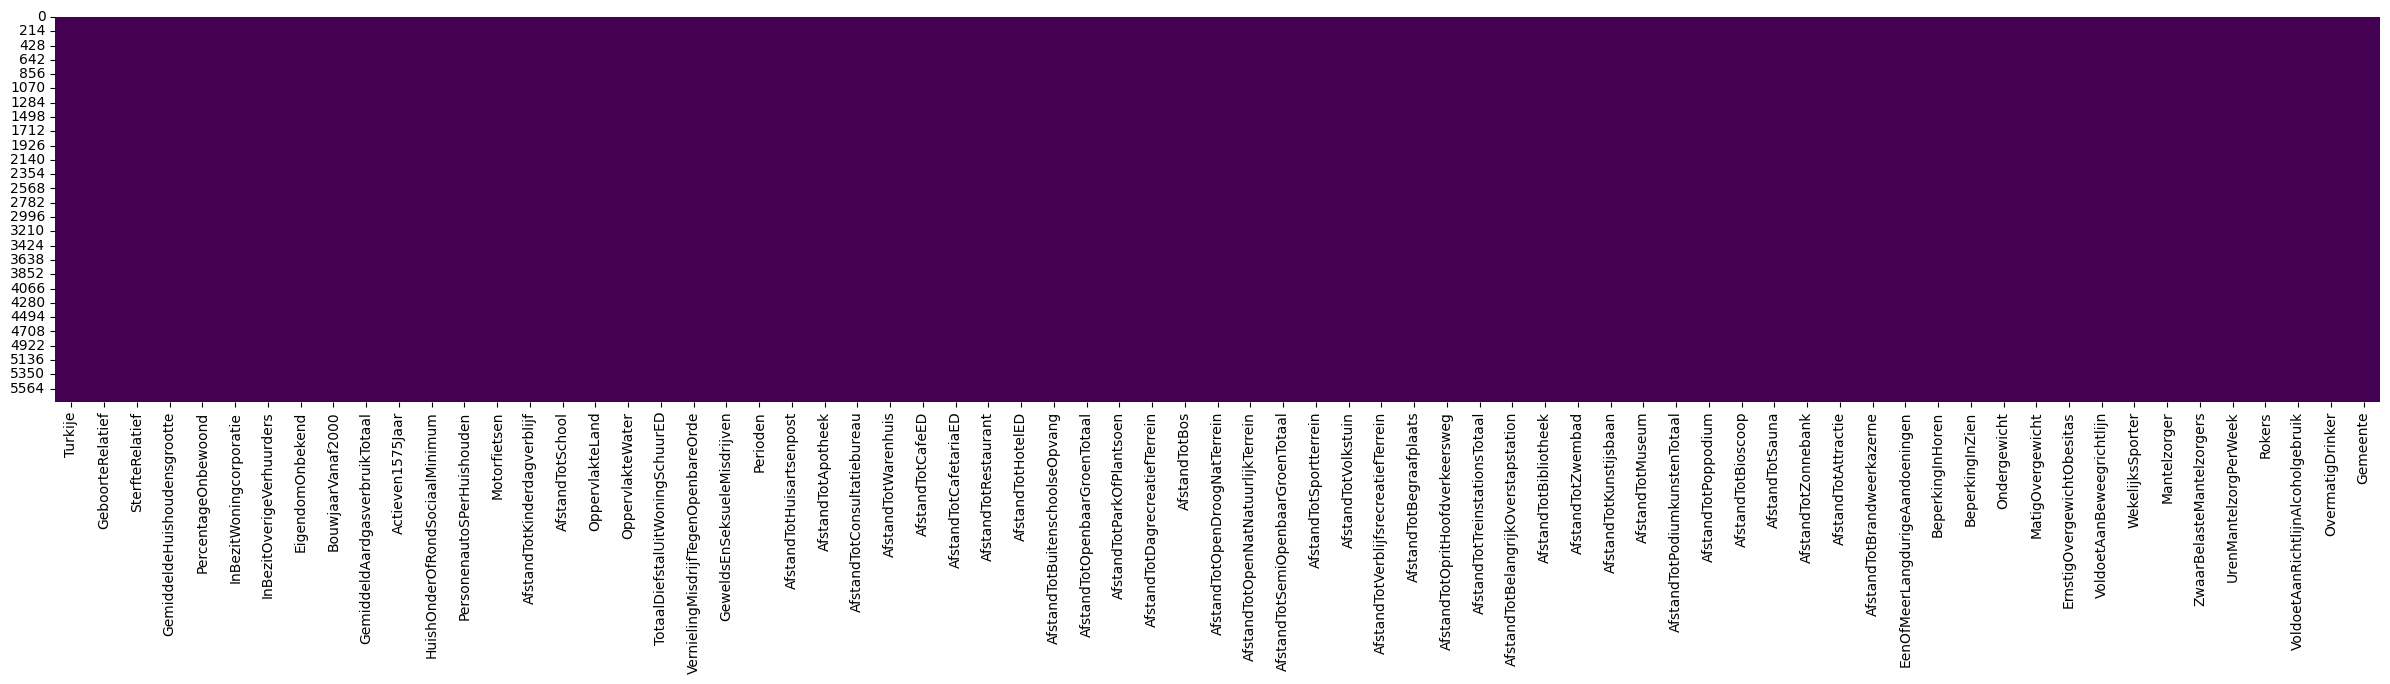

In [ ]:
# View a plot with all NaN values Yellow
fig, ax = plt.subplots(figsize=(30, 5))
sns.heatmap(df_filled.isnull(),cbar=False,cmap='viridis')

In [ ]:
# Checking for columns values
for col in df_cbsodata.columns:
    try:
        print('{}'.format(col))
    except:
        print(col)

Gemeente
AantalInwoners
Mannen
Vrouwen
kTot15Jaar
kTot25Jaar
kTot45Jaar
kTot65Jaar
kJaarOfOuder
Ongehuwd
Gehuwd
Gescheiden
Verweduwd
WestersTotaal
NietWestersTotaal
Marokko
NederlandseAntillenEnAruba
Suriname
Turkije
OverigNietWesters
GeboorteTotaal
GeboorteRelatief
SterfteTotaal
SterfteRelatief
HuishoudensTotaal
Eenpersoonshuishoudens
HuishoudensZonderKinderen
HuishoudensMetKinderen
GemiddeldeHuishoudensgrootte
Bevolkingsdichtheid
Woningvoorraad
GemiddeldeWoningwaarde
PercentageEengezinswoning
PercentageMeergezinswoning
PercentageBewoond
PercentageOnbewoond
Koopwoningen
HuurwoningenTotaal
InBezitWoningcorporatie
InBezitOverigeVerhuurders
EigendomOnbekend
BouwjaarVoor2000
BouwjaarVanaf2000
GemiddeldElektriciteitsverbruikTotaal
GemiddeldAardgasverbruikTotaal
AantalInkomensontvangers
GemiddeldInkomenPerInkomensontvanger
GemiddeldInkomenPerInwoner
kPersonenMetLaagsteInkomen
kPersonenMetHoogsteInkomen
Actieven1575Jaar
kHuishoudensMetLaagsteInkomen
kHuishoudensMetHoogsteInkomen
HuishoudensM

In [ ]:
# Checking for possible values
for col in df_cbsodata.columns:
    try:
        print('{} : {}'.format(col,df_cbsodata[col].unique()))
    except:
        print(col)

Gemeente : ['Aa en Hunze' 'Aalsmeer' 'Aalten' 'Achtkarspelen' 'Alblasserdam'
 'Albrandswaard' 'Alkmaar' 'Almelo' 'Almere' 'Alphen aan den Rijn'
 'Alphen-Chaam' 'Ameland' 'Amersfoort' 'Amstelveen' 'Amsterdam'
 'Apeldoorn' 'Appingedam' 'Arnhem' 'Assen' 'Asten' 'Baarle-Nassau' 'Baarn'
 'Barendrecht' 'Barneveld' 'Beek' 'Beemster' 'Beesel' 'Berg en Dal'
 'Bergeijk' 'Bergen (L.)' 'Bergen (NH.)' 'Bergen op Zoom' 'Berkelland'
 'Bernheze' 'Best' 'Beuningen' 'Beverwijk' 'De Bilt' 'Bladel' 'Blaricum'
 'Bloemendaal' 'Bodegraven-Reeuwijk' 'Boekel' 'Borger-Odoorn' 'Borne'
 'Borsele' 'Boxmeer' 'Boxtel' 'Breda' 'Brielle' 'Bronckhorst' 'Brummen'
 'Brunssum' 'Bunnik' 'Bunschoten' 'Buren' 'Capelle aan den IJssel'
 'Castricum' 'Coevorden' 'Cranendonck' 'Cuijk' 'Culemborg' 'Dalfsen'
 'Dantumadiel' 'Delft' 'Delfzijl' 'Deurne' 'Deventer' 'Diemen'
 'Dinkelland' 'Doesburg' 'Doetinchem' 'Dongen' 'Dordrecht' 'Drechterland'
 'Drimmelen' 'Dronten' 'Druten' 'Duiven' 'Echt-Susteren' 'Edam-Volendam'
 'Ede' 'Eemnes' '

In [ ]:
# Replace the exact string '.' with NaN values
df_cbsodata.replace('.', np.nan, inplace=True)

Reduce colums

In [ ]:
# Drop all columns containing the word Binnen
df_cbsodata = df_cbsodata.filter(regex=r'^(?!.*Binnen).*$', axis=1)

In [ ]:
# Checking all columns for duplicates
for col in df_cbsodata.columns:
    try:
        print('{}'.format(col))
    except:
        print(col)

Gemeente
AantalInwoners
Mannen
Vrouwen
kTot15Jaar
kTot25Jaar
kTot45Jaar
kTot65Jaar
kJaarOfOuder
Ongehuwd
Gehuwd
Gescheiden
Verweduwd
WestersTotaal
NietWestersTotaal
Marokko
NederlandseAntillenEnAruba
Suriname
Turkije
OverigNietWesters
GeboorteTotaal
GeboorteRelatief
SterfteTotaal
SterfteRelatief
HuishoudensTotaal
Eenpersoonshuishoudens
HuishoudensZonderKinderen
HuishoudensMetKinderen
GemiddeldeHuishoudensgrootte
Bevolkingsdichtheid
Woningvoorraad
GemiddeldeWoningwaarde
PercentageEengezinswoning
PercentageMeergezinswoning
PercentageBewoond
PercentageOnbewoond
Koopwoningen
HuurwoningenTotaal
InBezitWoningcorporatie
InBezitOverigeVerhuurders
EigendomOnbekend
BouwjaarVoor2000
BouwjaarVanaf2000
GemiddeldElektriciteitsverbruikTotaal
GemiddeldAardgasverbruikTotaal
AantalInkomensontvangers
GemiddeldInkomenPerInkomensontvanger
GemiddeldInkomenPerInwoner
kPersonenMetLaagsteInkomen
kPersonenMetHoogsteInkomen
Actieven1575Jaar
kHuishoudensMetLaagsteInkomen
kHuishoudensMetHoogsteInkomen
HuishoudensM

In [ ]:
import pandas as pd

def find_and_remove_high_correlation_columns(df, threshold):
    while True:
        # Compute correlation matrix
        corr_matrix = df.drop(columns=['Gemeente', 'Perioden']).corr(method='spearman').abs()

        # Find columns with correlation above threshold
        high_corr_columns = {}
        for column in corr_matrix:
            correlated_columns = corr_matrix[column][corr_matrix[column] >= threshold].index.tolist()
            for corr_column in correlated_columns:
                if corr_column != column:
                    correlation = corr_matrix[column][corr_column]
                    if column in high_corr_columns:
                        high_corr_columns[column].append((corr_column, correlation))
                    else:
                        high_corr_columns[column] = [(corr_column, correlation)]

        if not high_corr_columns:
            break

        # Sort columns by correlation values in descending order
        sorted_columns = sorted(high_corr_columns.items(), key=lambda x: max([y[1] for y in x[1]]), reverse=True)

        print(f'Dropped column: {sorted_columns[0][0]}')
        df.drop(columns=[sorted_columns[0][0]], inplace=True)

    return df

# Example usage
df_cbsodata = find_and_remove_high_correlation_columns(df_cbsodata, 0.70)

print(df_cbsodata)


Dropped column: Mannen
Dropped column: Vrouwen
Dropped column: kTot65Jaar
Dropped column: Bevolkingsdichtheid
Dropped column: Woningvoorraad
Dropped column: PersonenautoSTotaal
Dropped column: Gehuwd
Dropped column: Ongehuwd
Dropped column: HuishoudensMetKinderen
Dropped column: NormaalGewicht
Dropped column: Verweduwd
Dropped column: HuishoudensZonderKinderen
Dropped column: AantalInkomensontvangers
Dropped column: Koopwoningen
Dropped column: kTot25Jaar
Dropped column: PersonenautoS6JaarEnOuder
Dropped column: kTot15Jaar
Dropped column: Gescheiden
Dropped column: SterfteTotaal
Dropped column: kTot45Jaar
Dropped column: PersonenPerSoortUitkeringAOW
Dropped column: HuishoudensMetEenLaagInkomen
Dropped column: GemiddeldInkomenPerInkomensontvanger
Dropped column: NietWestersTotaal
Dropped column: BedrijfsvestigingenTotaal
Dropped column: PersonenautoSJongerDan6Jaar
Dropped column: RUCultuurRecreatieOverigeDiensten
Dropped column: MateVanStedelijkheid
Dropped column: PersonenPerSoortUitke

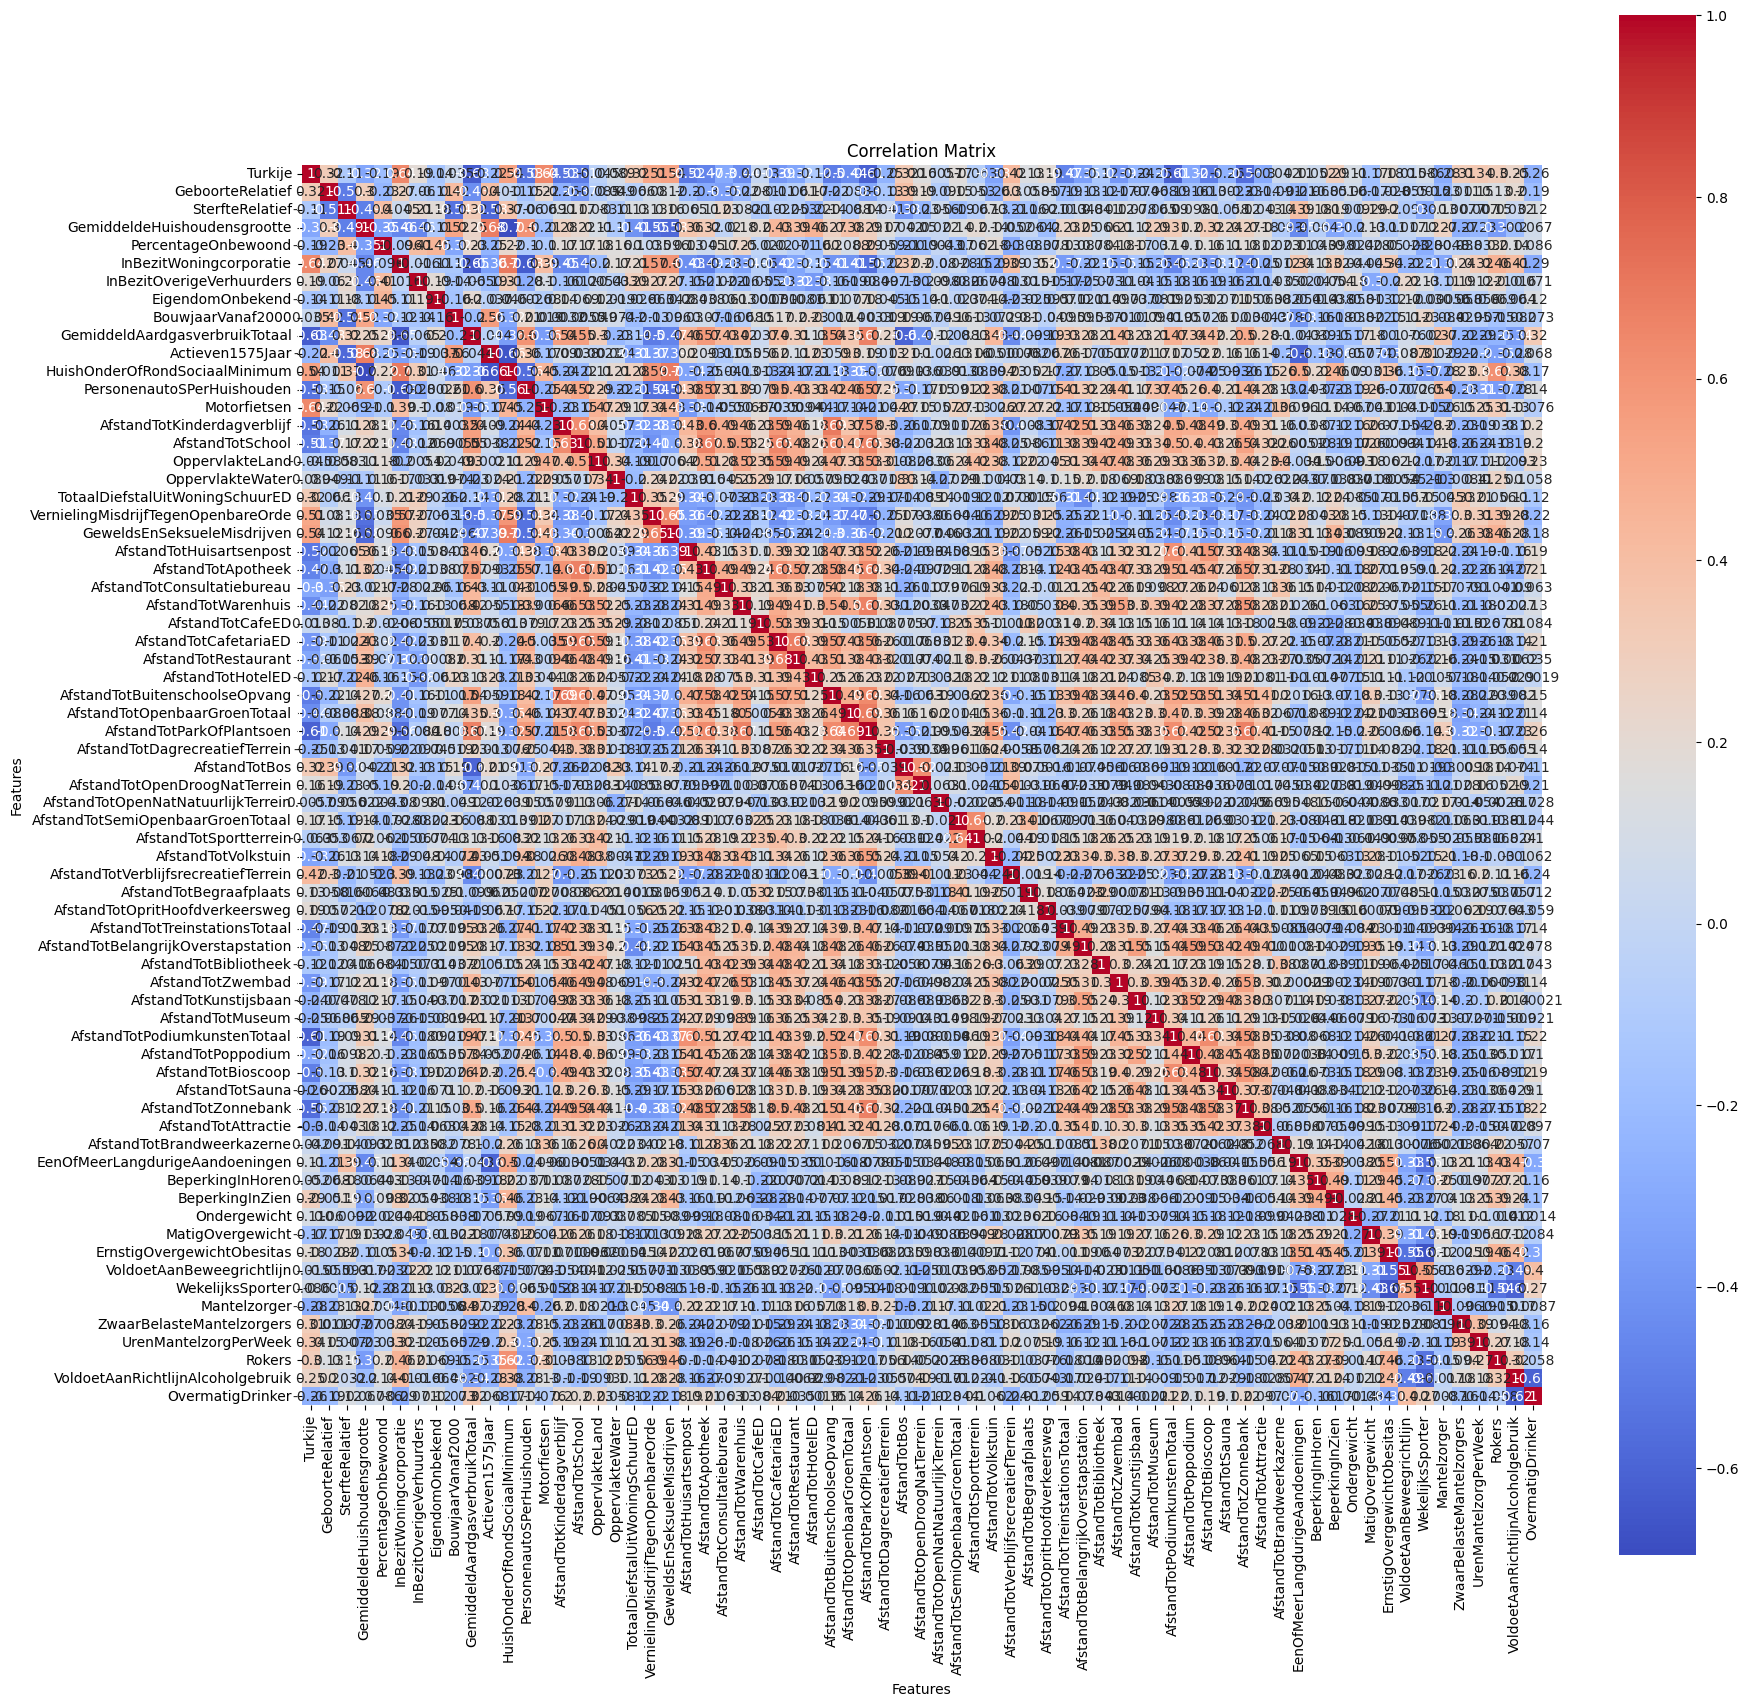

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_cbsodata.drop(columns=['Gemeente', 'Perioden']).corr(method='spearman')

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Add plot labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [ ]:
# Used imports -- standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cbsodata
import time
from joblib import Parallel, delayed
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# miscelaneous imports
import gc


In [ ]:
# Defining the function that you will run later
#https://github.com/K-Ellis/Neural-Network-Classification-and-Unbalanced-Bank-Marketing-Data/issues/1#issue-234132765
def calculate_vif_(X, thresh=5.0):
    variables = [X.columns[i] for i in range(X.shape[1])]
    dropped=True
    while dropped:
        dropped=False
        print(len(variables))
        vif = Parallel(n_jobs=-1,verbose=5)(delayed(variance_inflation_factor)(X[variables].values, ix) for ix in range(len(variables)))

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(time.ctime() + ' dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables.pop(maxloc)
            dropped=True

    print('Remaining variables:')
    print(variables)
    
    return X[[i for i in variables]]

def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

In [ ]:
#remaining columns with vif score lower then 5
ListMulticollinearityVIFTestColumns = []
vif_scores(calculate_vif_(df_cbsodata.drop(columns=['Gemeente', 'Perioden']),5))

69


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  60 | elapsed:    4.6s remaining:    0.8s


MissingDataError: exog contains inf or nans

Export data

In [ ]:
df_cbsodata.to_csv('cbsdata_prep.csv', index=False)